## Image downscale

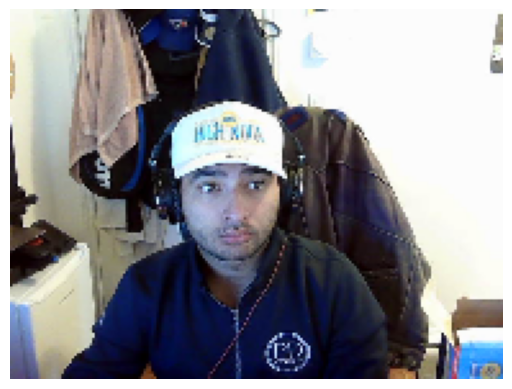

In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


# Constants
DOWNSCALE_FACTOR = 0.3

# Initialize video capture (0 is typically the default camera)
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image")
            break

        # Downscale the frame
        downscaled_frame = cv2.resize(frame, (0, 0), fx=DOWNSCALE_FACTOR, fy=DOWNSCALE_FACTOR)
        
        # Convert BGR to RGB for matplotlib
        downscaled_frame_rgb = cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2RGB)

        # Display the frame in Jupyter Notebook
        clear_output(wait=True)  # Clear previous output for a smoother display
        plt.imshow(downscaled_frame_rgb)
        plt.axis("off")  # Hide axis
        plt.show()

        # Add a short delay to control frame rate
        time.sleep(0.1)
        
except KeyboardInterrupt:
    # Exit the loop when interrupted
    pass
finally:
    # Release the camera and close any open windows
    cap.release()
    cv2.destroyAllWindows()


## Gray Scale Conversion

In [3]:
import cv2

# Constants
DOWNSCALE_FACTOR = 0.5

# Initialize video capture (0 is typically the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Downscale the fraame
    downscaled_frame = cv2.resize(frame, (0, 0), fx=DOWNSCALE_FACTOR, fy=DOWNSCALE_FACTOR)
    
    # Step 2: Convert to grayscale
    grayscale_frame = cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2GRAY)

    # Display the grayscale frame
    cv2.imshow("Grayscale Frame", grayscale_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

## Gaussian Blur

In [4]:
import cv2

# Constants
DOWNSCALE_FACTORx = 6

# Initialize video capture (0 is typically the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Downscale the frame
    downscaled_frame = cv2.resize(frame, (0, 0), fx=DOWNSCALE_FACTOR, fy=DOWNSCALE_FACTOR)
    
    # Step 2: Convert to grayscale
    grayscale_frame = cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Apply Gaussian Blur
    blurred_frame = cv2.GaussianBlur(grayscale_frame, (5, 5), 0)

    # Display the blurred frame
    cv2.imshow("Blurred Grayscale Frame", blurred_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

## Canny edge

Canny Edge Detection Thresholds
The Canny Edge Detection function in OpenCV, cv2.Canny(image, threshold1, threshold2), uses two threshold values that determine how sensitive the algorithm is to detecting edges.

1. Lower Threshold (threshold1)
This value defines the minimum intensity gradient for a pixel to be considered an edge.
Pixels with a gradient below this threshold are discarded.
2. Upper Threshold (threshold2)
This defines the maximum intensity gradient. Pixels with a gradient above this threshold are treated as strong edges.
Pixels with gradients between the two thresholds (weak edges) are considered edges only if they are connected to strong edges.
3. Typical Range for Threshold Values
a) Threshold Values: Typically range from 0 to 255, as pixel intensity in grayscale images goes from 0 (black) to 255 (white).
4. Suggested Threshold Settings
    1. Low Sensitivity: (100, 200) — Detects only the strongest edges. Useful for avoiding too much noise.
    2. Medium Sensitivity: (50, 150) — A balanced setting that detects more edges while keeping noise manageable.
    3. High Sensitivity: (10, 100) — Detects many edges, including weak ones. This setting may capture more detail but can also include more nois

In [7]:
import cv2

# Constants
DOWNSCALE_FACTOR = 0.5

# Initialize video capture (0 is typically the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Downscale the frame
    downscaled_frame = cv2.resize(frame, (0, 0), fx=DOWNSCALE_FACTOR, fy=DOWNSCALE_FACTOR)
    
    # Step 2: Convert to grayscale
    grayscale_frame = cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Apply Gaussian Blur
    blurred_frame = cv2.GaussianBlur(grayscale_frame, (5, 5), 0)
    
    # Step 4: Apply Canny Edge Detection
    edges = cv2.Canny(blurred_frame, 50, 150)

    # Display the edges
    cv2.imshow("Edge Detection", edges)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

## Hough Transform for lines

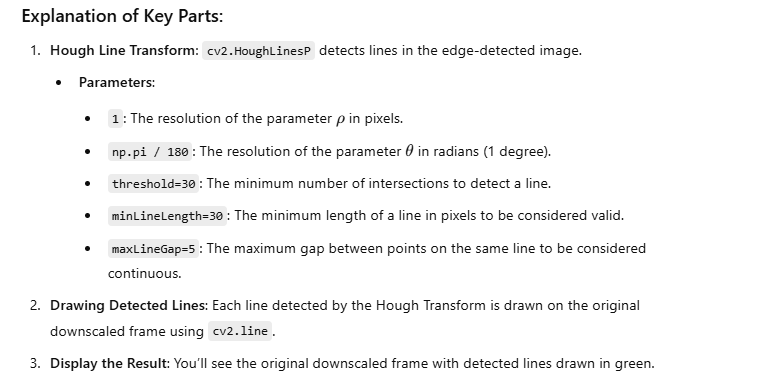

In [10]:
import cv2
import numpy as np

# Constants
DOWNSCALE_FACTOR = 0.5

# Initialize video capture (0 is typically the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Downscale the frame
    downscaled_frame = cv2.resize(frame, (0, 0), fx=DOWNSCALE_FACTOR, fy=DOWNSCALE_FACTOR)
    
    # Step 2: Convert to grayscale
    grayscale_frame = cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Apply Gaussian Blur
    blurred_frame = cv2.GaussianBlur(grayscale_frame, (5, 5), 0)
    
    # Step 4: Apply Canny Edge Detection
    edges = cv2.Canny(blurred_frame, 50, 150)
    
    # Step 5: Line Detection with Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=30, maxLineGap=5)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Draw each line on the downscaled frame
            cv2.line(edges, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the frame with detected lines
    cv2.imshow("Line Detection", edges)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

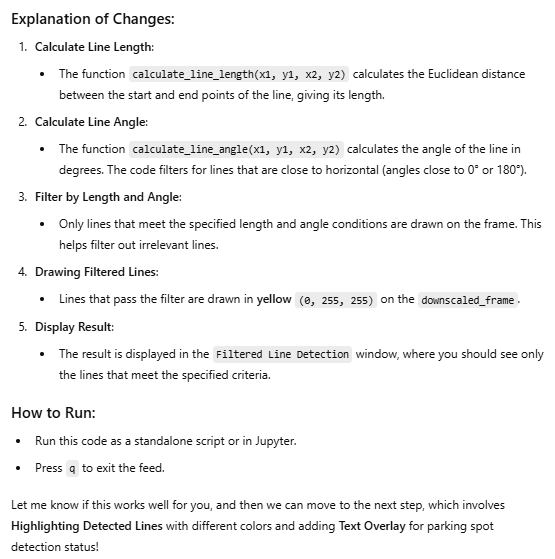
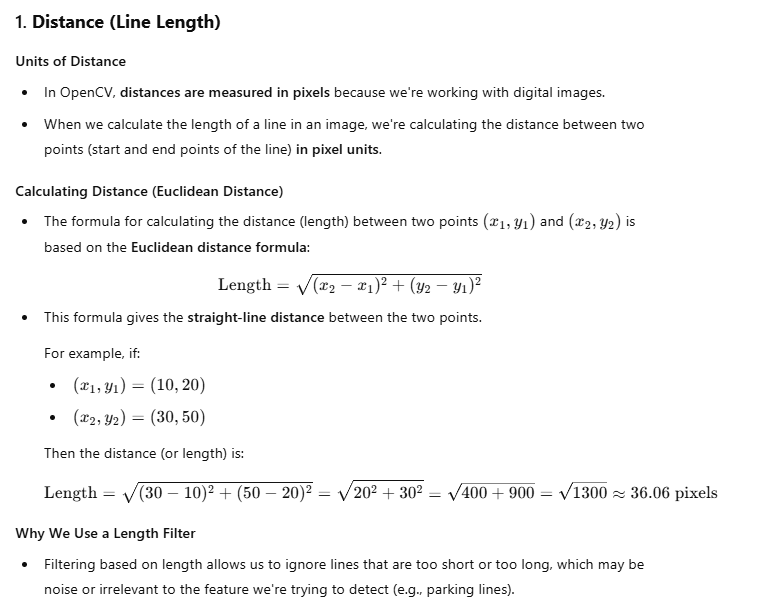
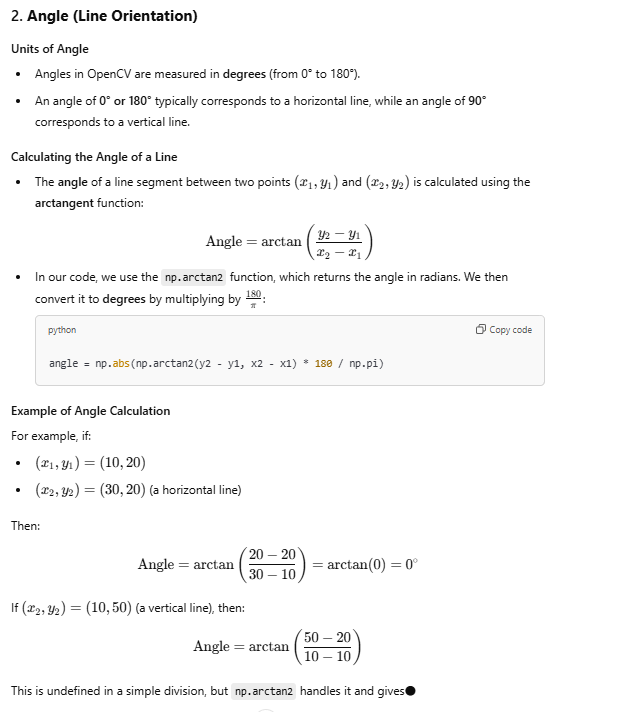


In [14]:
import cv2
import numpy as np

# Constants
DOWNSCALE_FACTOR = 0.5
MIN_LINE_LENGTH = 50    # Minimum length of line in pixels
MAX_LINE_LENGTH = 300   # Maximum length of line in pixels
ANGLE_MIN = 80         # Minimum angle in degrees for horizontal lines
ANGLE_MAX = 90          # Maximum angle in degrees for horizontal lines
ANGLE_ALT_MIN = 170     # Alternate minimum angle (close to 180°)
ANGLE_ALT_MAX = 190     # Alternate maximum angle (close to 180°)

# Initialize video capture (0 is typically the default camera)
cap = cv2.VideoCapture(0)

def calculate_line_length(x1, y1, x2, y2):
    """Calculate the length of a line segment."""
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def calculate_line_angle(x1, y1, x2, y2):
    """Calculate the angle of a line segment in degrees."""
    angle = np.abs(np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi)
    return angle

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Downscale the frame
    downscaled_frame = cv2.resize(frame, (0, 0), fx=DOWNSCALE_FACTOR, fy=DOWNSCALE_FACTOR)
    
    # Step 2: Convert to grayscale
    grayscale_frame = cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Apply Gaussian Blur
    blurred_frame = cv2.GaussianBlur(grayscale_frame, (5, 5), 0)
    
    # Step 4: Apply Canny Edge Detection
    edges = cv2.Canny(blurred_frame, 50, 150)
    
    # Step 5: Line Detection with Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=30, maxLineGap=5)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            
            # Calculate length and angle of the line
            length = calculate_line_length(x1, y1, x2, y2)
            angle = calculate_line_angle(x1, y1, x2, y2)
            
            # Apply filters for length and angle
            if (MIN_LINE_LENGTH < length < MAX_LINE_LENGTH) and (
                ANGLE_MIN < angle < ANGLE_MAX or ANGLE_ALT_MIN < angle < ANGLE_ALT_MAX
            ):
                # Draw the line if it passes the filters
                cv2.line(edges, (x1, y1), (x2, y2), (0, 255, 255), 2)

    # Display the frame with filtered lines
    cv2.imshow("Filtered Line Detection", edges)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

with mouse output

In [15]:
import cv2
import numpy as np

# Constants for line detection
DOWNSCALE_FACTOR = 0.5
TARGET_LINE_LENGTH = 50    # Approximate pixel length for 3 cm (adjust as needed)
ANGLE_MIN = 85             # Minimum angle close to 90 degrees
ANGLE_MAX = 95             # Maximum angle close to 90 degrees

# Initialize video capture
cap = cv2.VideoCapture(0)

# Function to calculate line length
def calculate_line_length(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Function to calculate line angle
def calculate_line_angle(x1, y1, x2, y2):
    angle = np.abs(np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi)
    return angle

# Function to handle mouse hover and print coordinates
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        print(f"Coordinates: ({x}, {y})")

# Set the mouse callback function for the display window
cv2.namedWindow("Line Detection")
cv2.setMouseCallback("Line Detection", mouse_callback)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Downscale the frame
    downscaled_frame = cv2.resize(frame, (0, 0), fx=DOWNSCALE_FACTOR, fy=DOWNSCALE_FACTOR)
    
    # Step 2: Convert to grayscale
    grayscale_frame = cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Apply Gaussian Blur
    blurred_frame = cv2.GaussianBlur(grayscale_frame, (5, 5), 0)
    
    # Step 4: Apply Canny Edge Detection
    edges = cv2.Canny(blurred_frame, 50, 150)
    
    # Step 5: Line Detection with Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=30, maxLineGap=5)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            
            # Calculate length and angle of the line
            length = calculate_line_length(x1, y1, x2, y2)
            angle = calculate_line_angle(x1, y1, x2, y2)
            
            # Filter for lines close to 90 degrees and around the target length
            if (TARGET_LINE_LENGTH - 10 < length < TARGET_LINE_LENGTH + 10) and (ANGLE_MIN < angle < ANGLE_MAX):
                # Draw the line if it meets criteria
                cv2.line(downscaled_frame, (x1, y1), (x2, y2), (0, 255, 255), 2)

    # Display the frame with filtered lines
    cv2.imshow("Line Detection", downscaled_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


Coordinates: (204, 111)
Coordinates: (202, 111)
Coordinates: (177, 117)
Coordinates: (148, 125)
Coordinates: (146, 126)
Coordinates: (126, 132)
Coordinates: (100, 142)
Coordinates: (84, 148)
Coordinates: (69, 153)
Coordinates: (65, 154)
Coordinates: (64, 154)
Coordinates: (65, 146)
Coordinates: (65, 141)
Coordinates: (65, 140)
Coordinates: (62, 117)
Coordinates: (61, 111)
Coordinates: (60, 90)
Coordinates: (60, 82)
Coordinates: (64, 68)
Coordinates: (65, 64)
Coordinates: (75, 47)
Coordinates: (77, 42)
Coordinates: (80, 29)
Coordinates: (81, 26)
Coordinates: (84, 21)
Coordinates: (85, 19)
Coordinates: (93, 16)
Coordinates: (94, 15)
Coordinates: (97, 14)
Coordinates: (98, 11)
Coordinates: (99, 8)
Coordinates: (99, 7)
Coordinates: (99, 3)
Coordinates: (100, 1)
Coordinates: (99, 2)
Coordinates: (66, 69)
Coordinates: (64, 74)
Coordinates: (34, 137)
Coordinates: (63, 238)
Coordinates: (63, 237)
Coordinates: (66, 225)
Coordinates: (66, 218)
Coordinates: (64, 214)
Coordinates: (62, 212)
Coordi

KeyboardInterrupt: 

get specific pixel measurements =

In [16]:
import cv2
import numpy as np

# Constants for line detection
DOWNSCALE_FACTOR = 0.5
TARGET_LINE_LENGTH = 50    # Approximate pixel length for 3 cm (adjust as needed)
ANGLE_MIN = 85             # Minimum angle close to 90 degrees
ANGLE_MAX = 95             # Maximum angle close to 90 degrees

# Initialize video capture
cap = cv2.VideoCapture(0)

# Variables to store the starting and ending points of the drag
start_point = None
end_point = None

# Function to calculate line length
def calculate_line_length(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Function to calculate line angle
def calculate_line_angle(x1, y1, x2, y2):
    angle = np.abs(np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi)
    return angle

# Mouse callback function for dragging
def mouse_callback(event, x, y, flags, param):
    global start_point, end_point
    
    # Right mouse button down (start of drag)
    if event == cv2.EVENT_RBUTTONDOWN:
        start_point = (x, y)
    
    # Mouse move with right button pressed (dragging)
    elif event == cv2.EVENT_MOUSEMOVE and flags & cv2.EVENT_FLAG_RBUTTON:
        end_point = (x, y)
    
    # Right mouse button up (end of drag)
    elif event == cv2.EVENT_RBUTTONUP:
        end_point = (x, y)
        
        # Calculate and display distance and angle
        if start_point and end_point:
            x1, y1 = start_point
            x2, y2 = end_point
            length = calculate_line_length(x1, y1, x2, y2)
            angle = calculate_line_angle(x1, y1, x2, y2)
            print(f"Distance (pixels): {length:.2f}, Angle (degrees): {angle:.2f}")
        
        # Reset points after calculation
        start_point = None
        end_point = None

# Set the mouse callback function for the display window
cv2.namedWindow("Line Detection")
cv2.setMouseCallback("Line Detection", mouse_callback)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Step 1: Downscale the frame
    downscaled_frame = cv2.resize(frame, (0, 0), fx=DOWNSCALE_FACTOR, fy=DOWNSCALE_FACTOR)
    
    # Step 2: Convert to grayscale
    grayscale_frame = cv2.cvtColor(downscaled_frame, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Apply Gaussian Blur
    blurred_frame = cv2.GaussianBlur(grayscale_frame, (5, 5), 0)
    
    # Step 4: Apply Canny Edge Detection
    edges = cv2.Canny(blurred_frame, 50, 150)
    
    # Step 5: Line Detection with Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=30, maxLineGap=5)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            
            # Calculate length and angle of the line
            length = calculate_line_length(x1, y1, x2, y2)
            angle = calculate_line_angle(x1, y1, x2, y2)
            
            # Filter for lines close to 90 degrees and around the target length
            if (TARGET_LINE_LENGTH - 10 < length < TARGET_LINE_LENGTH + 10) and (ANGLE_MIN < angle < ANGLE_MAX):
                # Draw the line if it meets criteria
                cv2.line(downscaled_frame, (x1, y1), (x2, y2), (0, 255, 255), 2)

    # Display the frame with filtered lines and any drag visualization
    if start_point and end_point:
        cv2.line(downscaled_frame, start_point, end_point, (255, 0, 0), 2)  # Visualize the drag line
    cv2.imshow("Line Detection", downscaled_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


Distance (pixels): 29.15, Angle (degrees): 5.91
Distance (pixels): 22.36, Angle (degrees): 10.30
Distance (pixels): 21.02, Angle (degrees): 2.73
Distance (pixels): 52.61, Angle (degrees): 98.75
Distance (pixels): 84.72, Angle (degrees): 11.58
Distance (pixels): 63.00, Angle (degrees): 0.00
Distance (pixels): 43.74, Angle (degrees): 10.54
Distance (pixels): 145.58, Angle (degrees): 5.12
Distance (pixels): 124.40, Angle (degrees): 4.61
Distance (pixels): 106.38, Angle (degrees): 4.85
Distance (pixels): 77.10, Angle (degrees): 2.97
Distance (pixels): 68.03, Angle (degrees): 1.68
Distance (pixels): 96.05, Angle (degrees): 1.79
Distance (pixels): 113.64, Angle (degrees): 6.06
Distance (pixels): 74.01, Angle (degrees): 0.77
Distance (pixels): 72.34, Angle (degrees): 5.55
Distance (pixels): 78.01, Angle (degrees): 90.73
Distance (pixels): 103.82, Angle (degrees): 7.19
Distance (pixels): 64.01, Angle (degrees): 0.90
Distance (pixels): 85.01, Angle (degrees): 0.67
Distance (pixels): 103.41, Ang

KeyboardInterrupt: 